<a href="https://colab.research.google.com/github/zaephaer/MLU-05-BostonHousing-FeatureImportant/blob/main/Boston_Housing_Feature_Important.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking on Features Important

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

print("Numpy version : ", np.__version__)
print("Pandas version : ", pd.__version__)
import sys
print("Python version : ", sys.version)
import sklearn
print("Sklearn version : ", sklearn.__version__)

Numpy version :  1.19.5
Pandas version :  1.1.5
Python version :  3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Sklearn version :  0.22.2.post1


In [36]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
from sklearn.model_selection import train_test_split
X = df.values
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [38]:
y = boston_data.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# According to Adaboost

In [40]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)
ada.fit(X_train, y_train)

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [41]:
df.columns
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature_imp']
result.sort_values(by='feature_imp', ascending=False)

,feature_imp
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


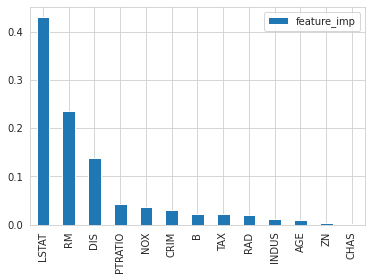

In [42]:
result.sort_values(by='feature_imp', ascending=False).plot(kind='bar');

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print("ADABOOST MSE and R-Squared Calculation")
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

ADABOOST MSE and R-Squared Calculation
MSE train: 4.6605, test: 13.4949
R^2 train: 0.9470, test: 0.8189


# According to Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

In [45]:
df.columns
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']

result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.414411
RM,0.403853
DIS,0.062808
CRIM,0.032138
PTRATIO,0.018331
NOX,0.015085
AGE,0.014140
B,0.012799
TAX,0.012007
INDUS,0.006775


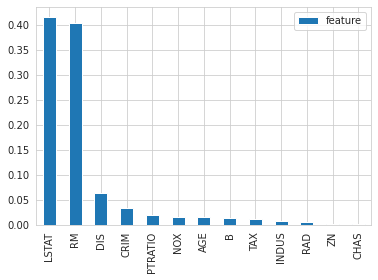

In [46]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

In [47]:
print("RANDOM FOREST MSE and R-Squared Calculation")
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

RANDOM FOREST MSE and R-Squared Calculation
MSE train: 1.8700, test: 9.3921
R^2 train: 0.9787, test: 0.8740


# According to Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X, y)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree.feature_importances_

array([3.89130496e-02, 0.00000000e+00, 0.00000000e+00, 9.64077851e-04,
       5.83896458e-02, 6.12476152e-01, 6.11385082e-04, 7.37730793e-02,
       0.00000000e+00, 4.96306639e-03, 3.98297821e-03, 2.34938304e-03,
       2.03577183e-01])

In [49]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['tree_fi']

result.sort_values(by='tree_fi', ascending=False)

,tree_fi
RM,0.612476
LSTAT,0.203577
DIS,0.073773
NOX,0.058390
CRIM,0.038913
TAX,0.004963
PTRATIO,0.003983
B,0.002349
CHAS,0.000964
AGE,0.000611


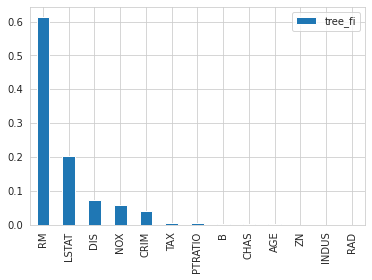

In [50]:
result.sort_values(by='tree_fi', ascending=False).plot(kind='bar');

In [51]:
print("DECISION TREE MSE and R-Squared Calculation")
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

DECISION TREE MSE and R-Squared Calculation
MSE train: 6.9772, test: 6.5212
R^2 train: 0.9206, test: 0.9125
